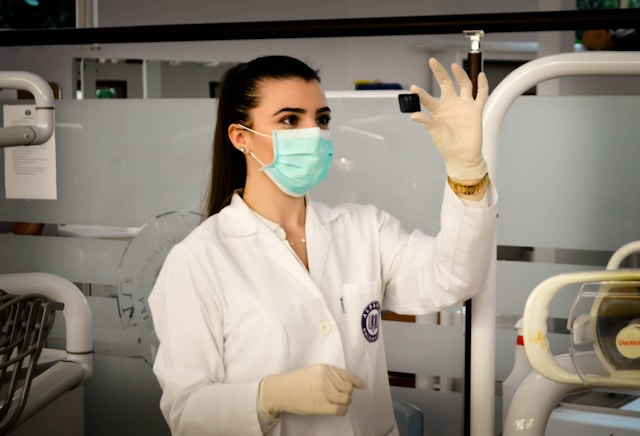

<center>Photo by <a href="https://unsplash.com/@anikolleshi?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Ani Kolleshi</a> on <a href="https://unsplash.com/photos/woman-inside-laboratory-7jjnJ-QA9fY?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a></center>
  

# <p style="padding:15px; background-color:purple; font-family:arial; font-weight:bold; color:white; font-size:100%; letter-spacing: 2px; text-align:left; border-radius: 10px 10px">1/ Introduction</p>

This dataset contains information from 590 patients:

- Healthy controls (183)
- Patients with non-cancerous pancreatic conditions, like chronic pancreatitis (208)
- Patients with pancreatic cancer (199)

Our goal is to try to predict which patients have pancreatic cancer based on the features. Pancreatic cancer often shows no symptoms until it is too late for effective treatment, so an early test could be valuable.

# <p style="padding:15px; background-color:purple; font-family:arial; font-weight:bold; color:white; font-size:100%; letter-spacing: 2px; text-align:left; border-radius: 10px 10px">2/ Packages</p>

In [1]:
!pip install pycaret -q > /dev/null 2>&1

import pandas as pd
import pycaret
import seaborn as sns
import missingno as msno
import numpy as np
from pycaret.classification import *
sns.set()
sns.set_context("paper")
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

# <p style="padding:15px; background-color: purple; font-family:arial; font-weight:bold; color:white; font-size:100%; letter-spacing: 2px; text-align:left; border-radius: 10px 10px">3/ Data</p>

In [2]:
df = pd.read_csv('../input/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv', index_col = 0)
print("The data has the shape: ",df.shape)

The data has the shape:  (590, 13)


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

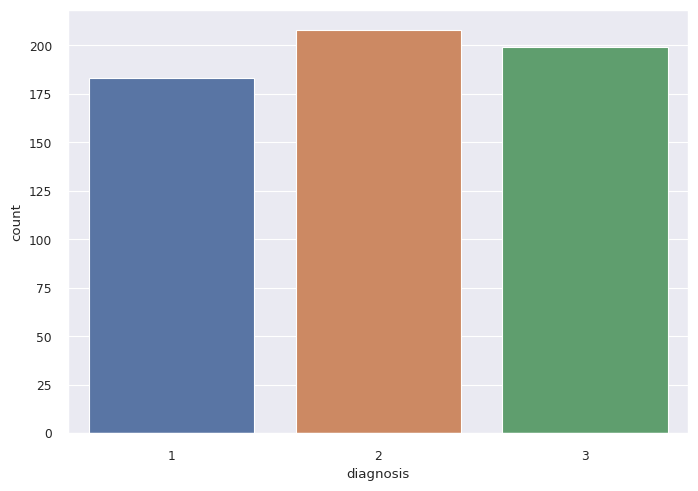

In [3]:
sns.countplot(data = df, x = 'diagnosis')

In [4]:
df.sample(5).T

sample_id,S143,S471,S33,S423,S409
patient_cohort,Cohort2,Cohort1,Cohort1,Cohort1,Cohort1
sample_origin,BPTB,LIV,BPTB,LIV,LIV
age,36,62,50,68,69
sex,F,F,M,M,F
diagnosis,1,3,1,3,3
stage,NaN,IIB,NaN,IIB,III
benign_sample_diagnosis,NaN,NaN,NaN,NaN,NaN
plasma_CA19_9,5.128234,318.0,3.53,91.0,556.0
creatinine,0.96135,1.36851,0.57681,2.30724,0.91611
LYVE1,0.019426,3.035614,0.535693,6.221869,7.494335


In [5]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [6]:
df.describe(include = 'object')

,patient_cohort,sample_origin,sex,stage,benign_sample_diagnosis
count,590,590,590,199,208
unique,2,4,2,8,52
top,Cohort1,BPTB,F,III,Pancreatitis
freq,332,409,299,76,41


# <p style="padding:15px; background-color:purple; font-family:arial; font-weight:bold; color:white; font-size:100%; letter-spacing: 2px; text-align:left; border-radius: 10px 10px">4/ Features</p>

In [7]:
pd.read_csv('../input/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 documentation.csv', index_col = 0)[['Details']]

,Details
Column name,
sample_id,Unique string identifying each subject
patient_cohort,"Cohort 1, previously used samples; Cohort 2, newly added samples"
sample_origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK"
age,Age in years
sex,"M = male, F = female"
diagnosis,"1 = control (no pancreatic disease), 2 = benign hepatobiliary disease (119 of which are chronic pancreatitis); 3 = Pancreatic ductal adenocarcinoma, i.e. pancreatic cancer"
stage,"For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV"
benign_sample_diagnosis,"For those with a benign, non-cancerous diagnosis, what was the diagnosis?"
plasma_CA19_9,Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).


# <p style="padding:15px; background-color:purple; font-family:arial; font-weight:bold; color:white; font-size:100%; letter-spacing: 2px; text-align:left; border-radius: 10px 10px">5/ Missing values</p>

<AxesSubplot: >

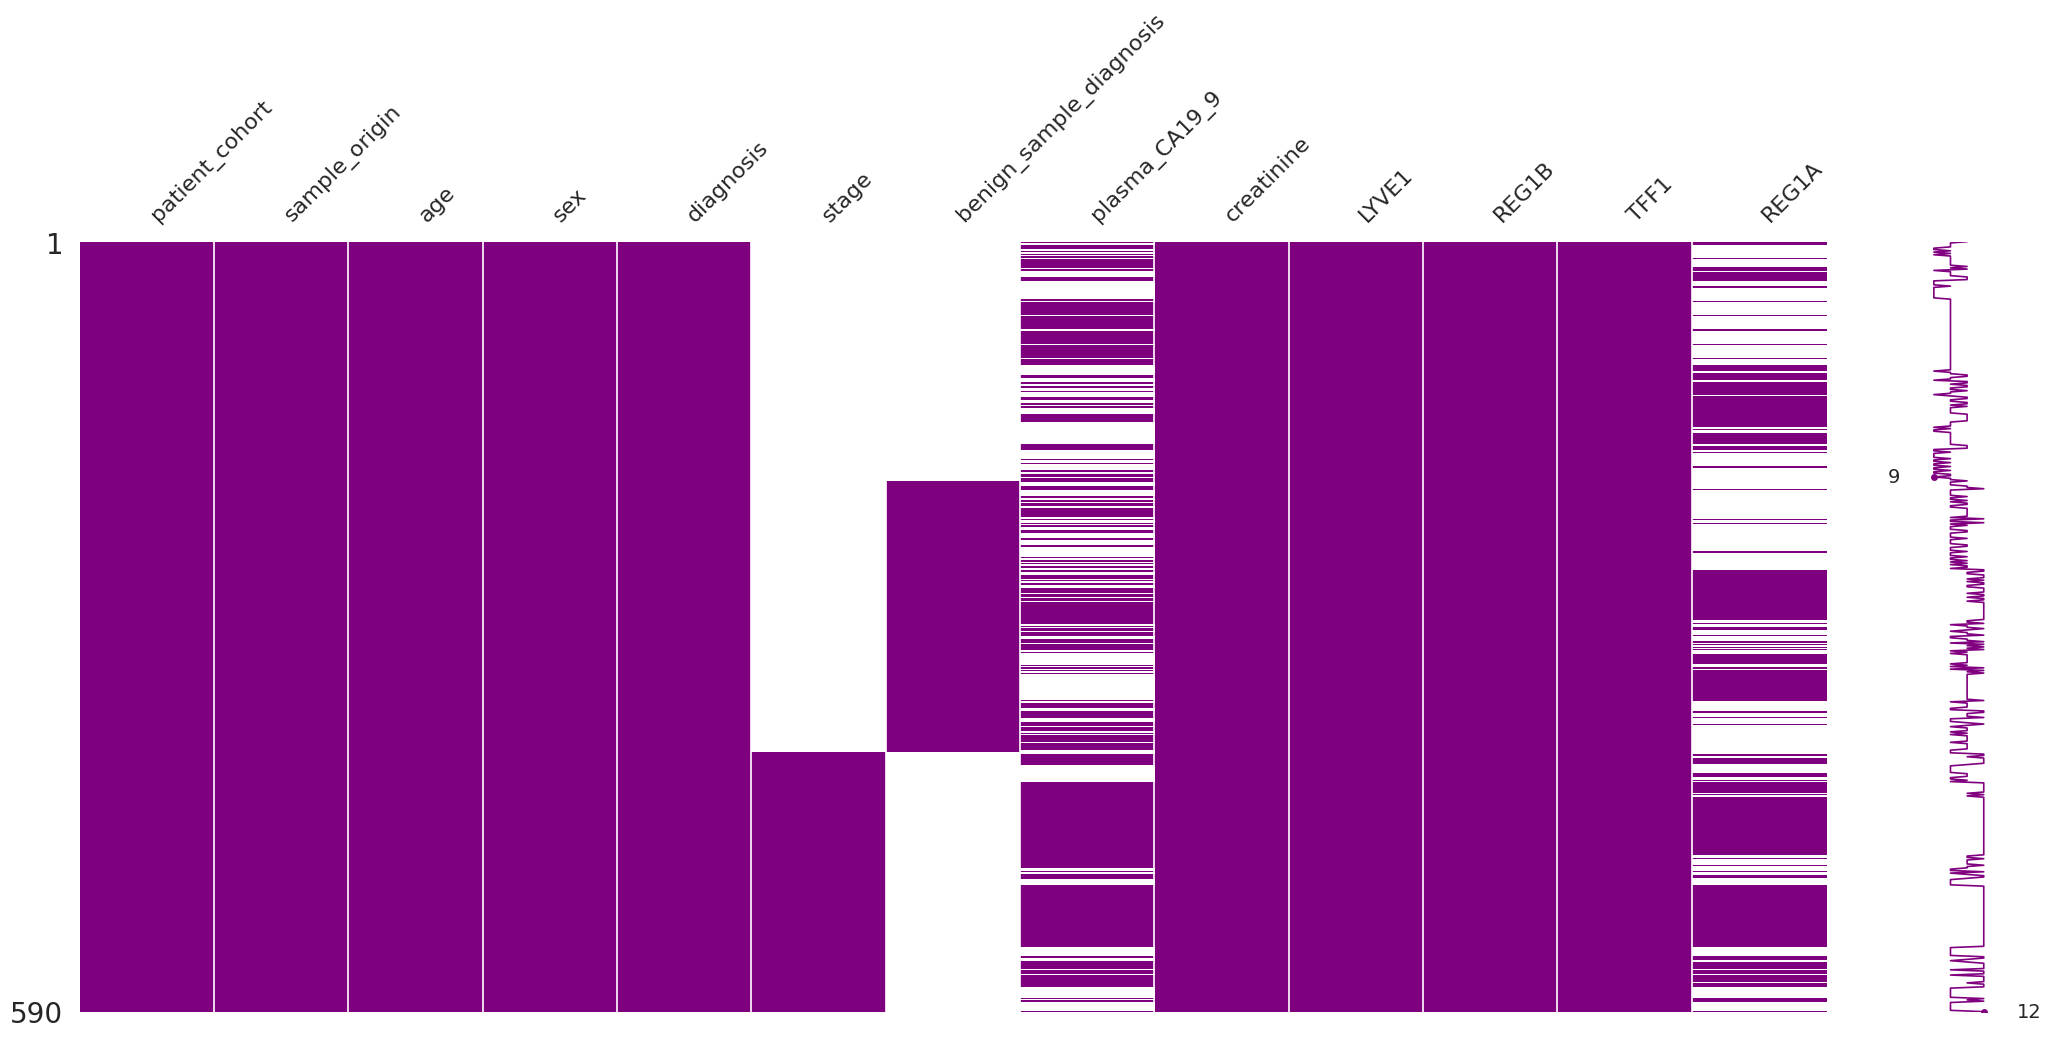

In [8]:
msno.matrix(df, color = (.5,0,.5))

Notice that large numbers of values for 'stage' and 'benign_sample_diagnosis' appear to be missing. Only diagnosis 2 values are present in the 'benign_sample_diagnosis' feature (as the name suggests) whereas only diagnosis 3 values are present in the 'stage' feature.

In [9]:
df[df['benign_sample_diagnosis'].isnull() == False].diagnosis.value_counts()

2    208
Name: diagnosis, dtype: int64

In [10]:
df[df['stage'].isnull() == False].diagnosis.value_counts()

3    199
Name: diagnosis, dtype: int64

In [11]:
df.isnull().sum()

patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

<AxesSubplot: xlabel='patient_cohort', ylabel='count'>

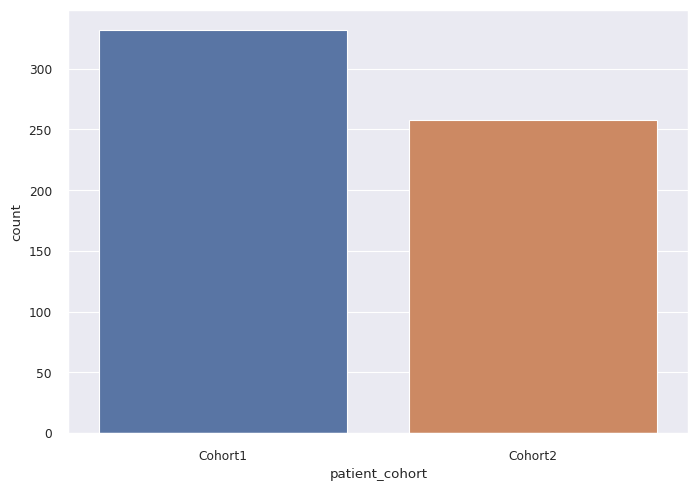

In [12]:
sns.countplot(x = df.patient_cohort)

In [13]:
df.groupby('diagnosis')['patient_cohort'].value_counts(normalize = True)

diagnosis  patient_cohort
1          Cohort2           0.557377
           Cohort1           0.442623
2          Cohort2           0.572115
           Cohort1           0.427885
3          Cohort1           0.814070
           Cohort2           0.185930
Name: patient_cohort, dtype: float64

<AxesSubplot: xlabel='sample_origin', ylabel='count'>

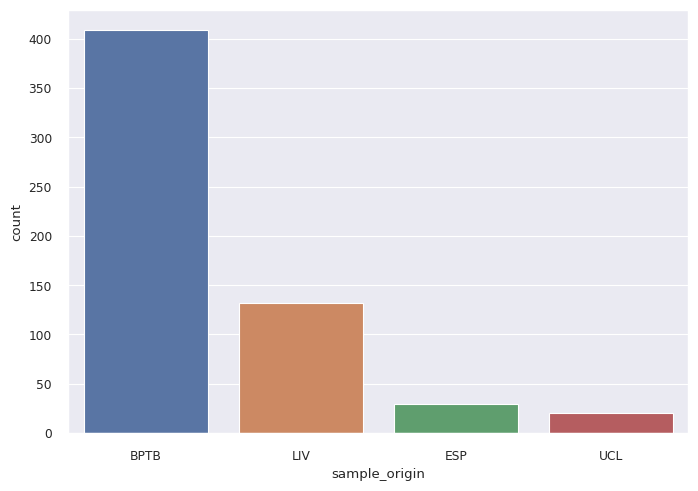

In [14]:
sns.countplot(x = df.sample_origin)

In [15]:
df.groupby('sample_origin')['diagnosis'].value_counts(normalize = True)

sample_origin  diagnosis
BPTB           1            0.447433
               2            0.349633
               3            0.202934
ESP            3            0.793103
               2            0.206897
LIV            3            0.704545
               2            0.295455
UCL            2            1.000000
Name: diagnosis, dtype: float64

In [16]:
groups = df.groupby('diagnosis').mean()
groups.style.highlight_max()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
diagnosis,,,,,,,
1,56.333333,8.749569,0.797633,1.212887,41.327901,169.024140,227.871886
2,54.701923,61.785741,0.847929,2.084612,64.174510,448.256897,547.458092
3,66.180905,1476.154733,0.916281,5.788567,226.308587,1148.611527,1138.323721


In [17]:
stage = df.groupby('stage').mean()
stage.drop(columns = 'diagnosis').style.highlight_max()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
stage,,,,,,,
I,81.000000,nan,0.565500,12.017150,431.422530,874.099700,nan
IA,56.666667,10.666667,0.882180,2.030466,87.426656,330.596590,182.727500
IB,68.083333,1486.866667,0.615453,3.069541,128.816342,564.475333,1811.717200
II,65.714286,nan,1.016284,9.979902,503.062302,1467.856400,1929.561250
IIA,64.818182,592.909091,0.643642,3.113806,206.682191,1607.506765,636.385556
IIB,67.838235,1345.557833,0.782386,5.294798,199.195550,1068.569260,764.179700
III,63.789474,1662.508308,1.074896,6.296259,221.185408,1118.929278,1148.339125
IV,69.904762,3430.300000,1.078759,7.348032,316.456271,1632.152213,4132.146000


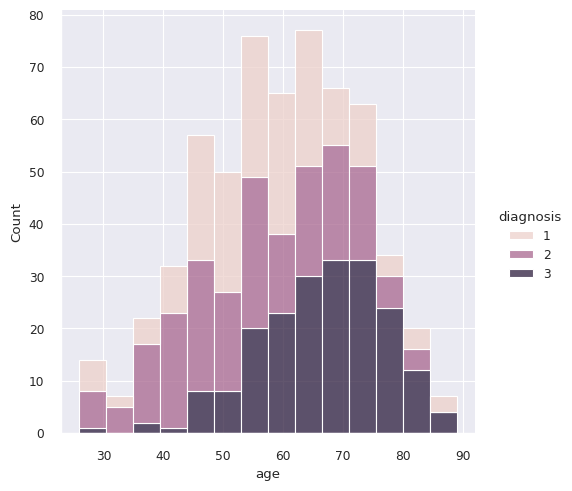

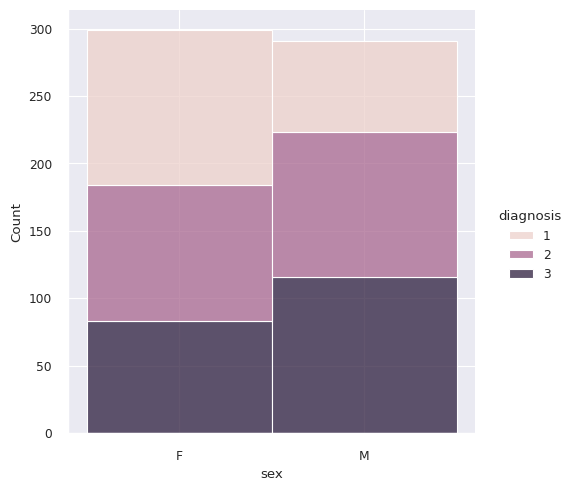

In [18]:
for feature in ['age','sex']:
    sns.displot(df,x= feature, hue="diagnosis", multiple='stack')

In [19]:
corr = df.corr().diagnosis.sort_values(ascending = False)
corr = corr.to_frame().drop(index = 'diagnosis')
corr.style.highlight_max()

,diagnosis
LYVE1,0.540384
TFF1,0.392613
REG1B,0.383516
age,0.308251
plasma_CA19_9,0.263950
REG1A,0.260110
creatinine,0.074888


In [20]:
df.drop(columns = ['diagnosis','age']).skew().sort_values(ascending = False)

plasma_CA19_9    8.018985
TFF1             5.158302
REG1A            4.469123
REG1B            3.333925
creatinine       1.466413
LYVE1            1.394014
dtype: float64

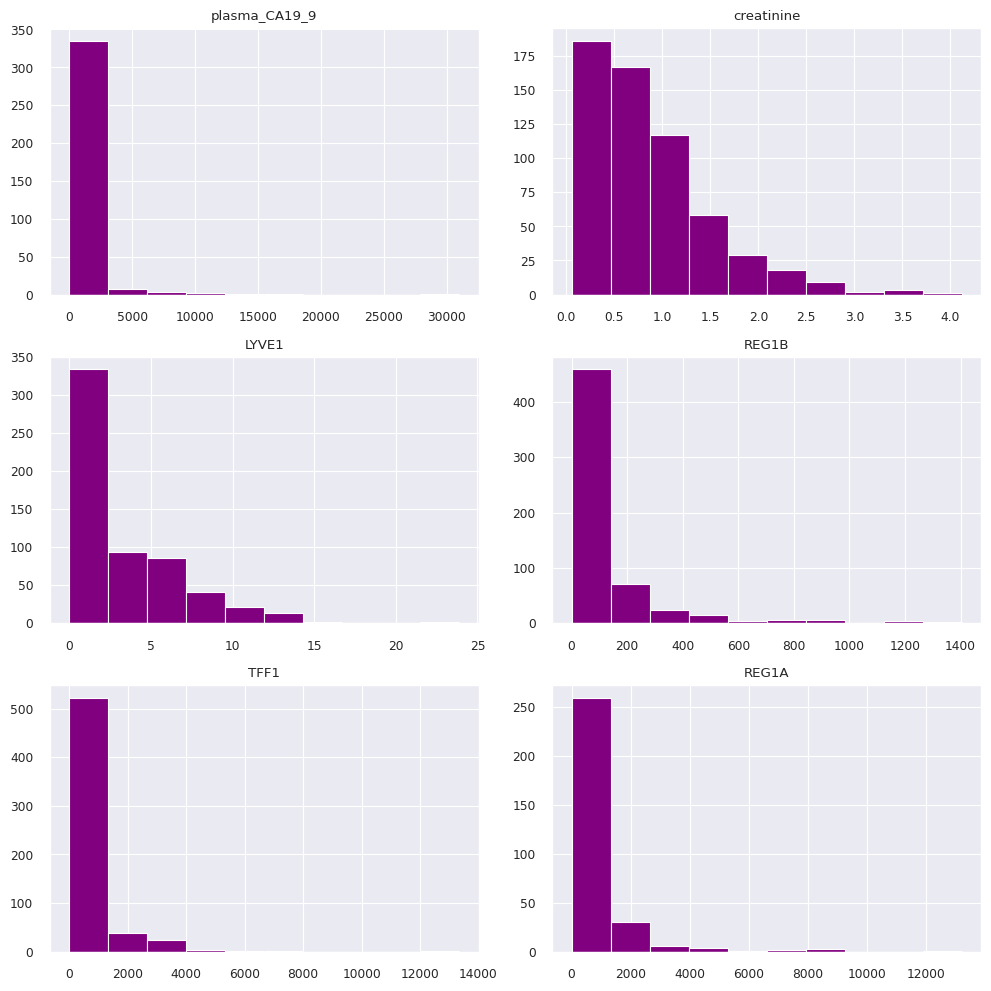

In [21]:
df.drop(columns = ['diagnosis','age']).hist(figsize=(10,10), grid = True, color = 'purple')
plt.tight_layout()

In [22]:
features_to_ignore = ['patient_cohort', 'sample_origin','stage','benign_sample_diagnosis']

In [23]:
s = setup(df, target = 'diagnosis', experiment_name = 'pancreas', train_size = 0.8, session_id = 71, numeric_imputation = 'median',ignore_features = features_to_ignore, normalize = True)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(590, 13)"
5,Transformed data shape,"(590, 9)"
6,Transformed train set shape,"(472, 9)"
7,Transformed test set shape,"(118, 9)"
8,Ignore features,4
9,Numeric features,7


In [24]:
best = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7477,0.0000,0.7477,0.7521,0.7466,0.6211,0.6238,0.2670
xgboost,Extreme Gradient Boosting,0.7414,0.8815,0.7414,0.7459,0.7400,0.6118,0.6148,0.1350
catboost,CatBoost Classifier,0.7413,0.8869,0.7413,0.7483,0.7414,0.6115,0.6140,2.7880
rf,Random Forest Classifier,0.7138,0.8751,0.7138,0.7155,0.7111,0.5705,0.5734,0.1420
et,Extra Trees Classifier,0.7137,0.8582,0.7137,0.7203,0.7127,0.5701,0.5735,0.1180
lightgbm,Light Gradient Boosting Machine,0.7074,0.8753,0.7074,0.7138,0.7057,0.5608,0.5645,0.3390
ada,Ada Boost Classifier,0.6290,0.0000,0.6290,0.6486,0.6232,0.4413,0.4513,0.0890
dt,Decision Tree Classifier,0.6273,0.7194,0.6273,0.6358,0.6253,0.4401,0.4446,0.0420
lr,Logistic Regression,0.6098,0.0000,0.6098,0.6245,0.6095,0.4166,0.4220,0.4080
svm,SVM - Linear Kernel,0.5613,0.0000,0.5613,0.5721,0.5399,0.3424,0.3535,0.0400


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [25]:
tuned = tune_model(best[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7917,0.0000,0.7917,0.7911,0.7862,0.6865,0.6906
1,0.7917,0.0000,0.7917,0.7903,0.7893,0.6865,0.6878
2,0.7234,0.0000,0.7234,0.7272,0.7248,0.5852,0.5856
3,0.7021,0.0000,0.7021,0.6996,0.6960,0.5521,0.5555
4,0.7021,0.0000,0.7021,0.7281,0.7070,0.5524,0.5597
5,0.7021,0.0000,0.7021,0.7171,0.7051,0.5539,0.5573
6,0.7447,0.0000,0.7447,0.7406,0.7382,0.6179,0.6217
7,0.7447,0.0000,0.7447,0.7489,0.7463,0.6155,0.6160
8,0.8085,0.0000,0.8085,0.8130,0.8102,0.7117,0.7121


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


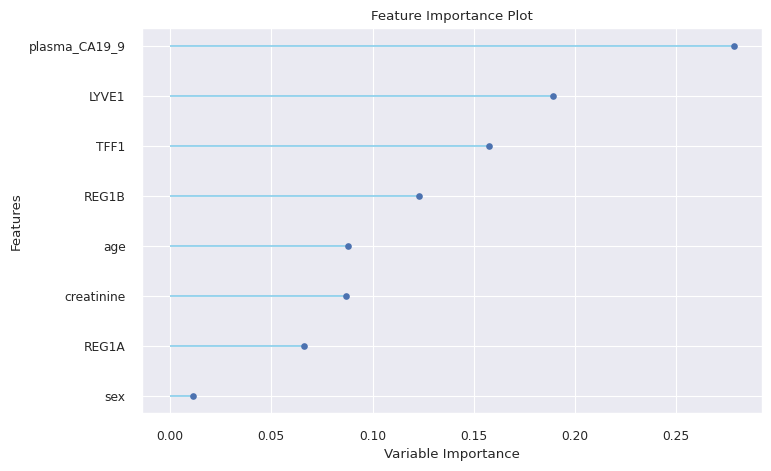

In [26]:
plot_model(tuned, plot = 'feature')

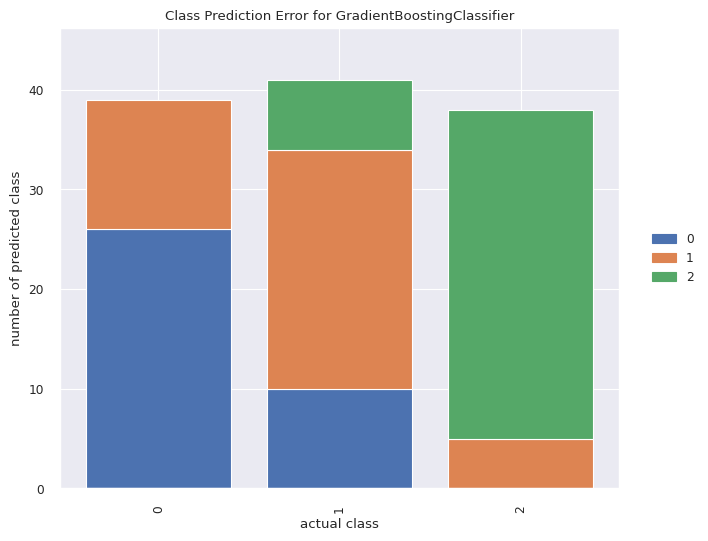

In [27]:
plot_model(tuned, plot = 'error')

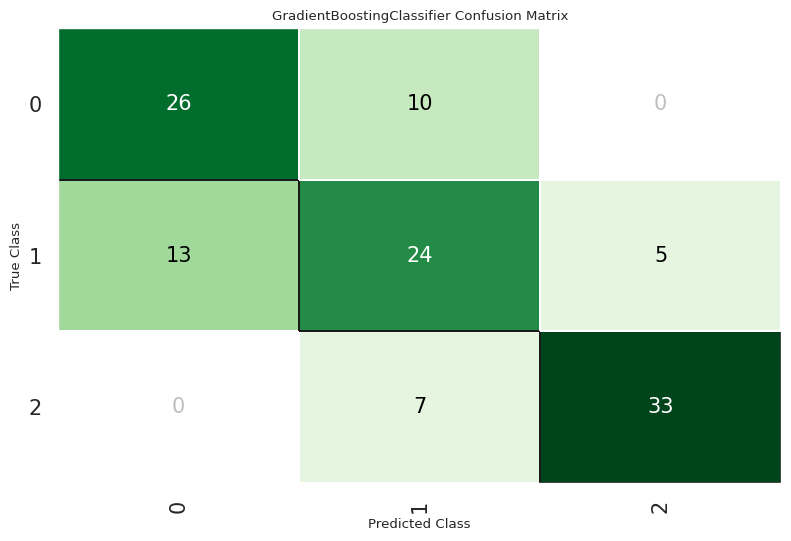

In [28]:
plot_model(tuned, plot = 'confusion_matrix')

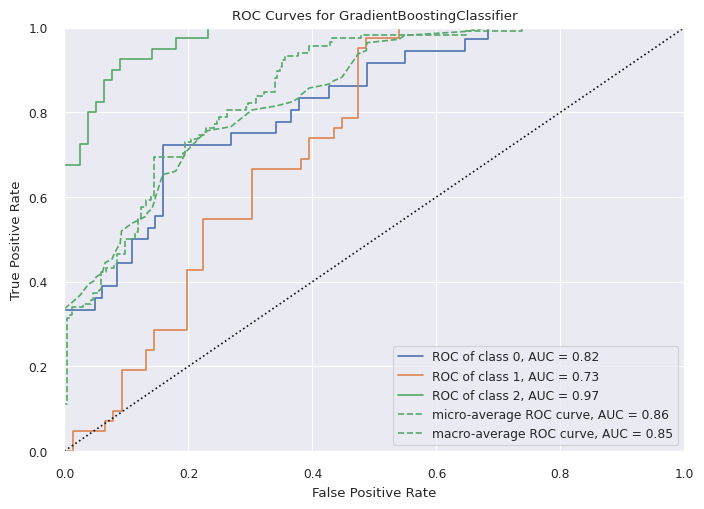

In [29]:
plot_model(tuned, plot = 'auc')

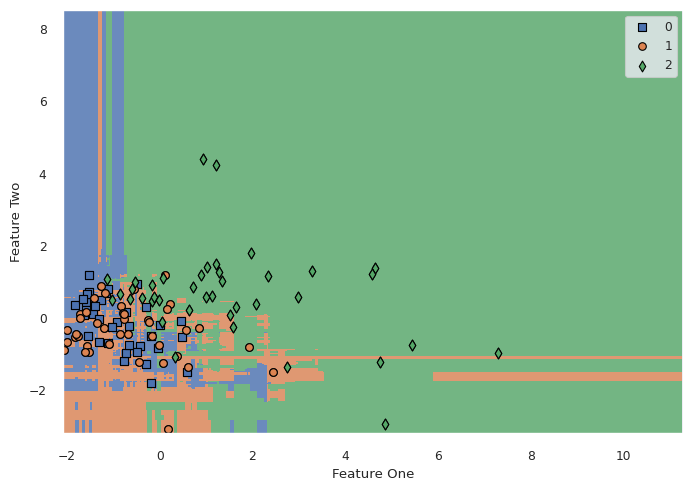

In [30]:
plot_model(tuned, plot = 'boundary')

In [31]:
preds = predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7034,0.8412,0.7034,0.7061,0.7042,0.5549,0.5553


In [32]:
final = finalize_model(tuned)
save_model(final, 'pancreas_pipeline')
preds = predict_model(final)

Transformation Pipeline and Model Successfully Saved


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9153,0.9770,0.9153,0.9175,0.9160,0.8727,0.8731


In [33]:
tuned

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=3,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           random_state=71, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)